In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
data = pd.read_csv('all_data.csv')

column_mapper = {'Country': 'country', "Year": 'year', "Life expectancy at birth (years)": 'life_expectancy', 'GDP': 'gdp'}

data.rename(columns = column_mapper, inplace = True)

usa_rename = lambda country: 'USA' if country == 'United States of America' else country

data['country'] = data.country.apply(usa_rename)

In [22]:
#data.country.unique()
data.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [118]:
data.country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

In [14]:
data.groupby('country').gdp.mean()

country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: gdp, dtype: float64

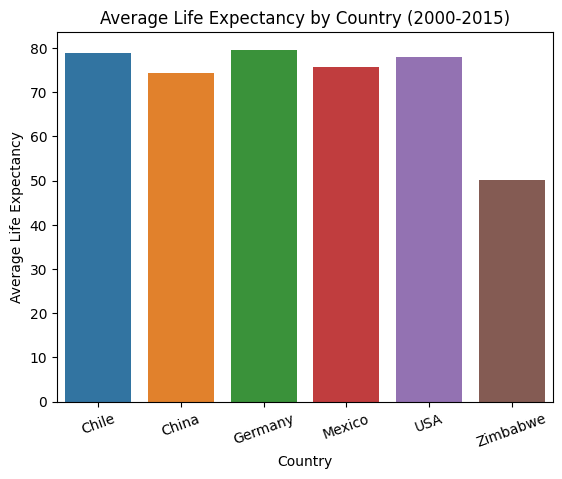

In [181]:
life_expectancy_means = data.groupby('country').life_expectancy.mean().reset_index()

sns.barplot(data = life_expectancy_means, x = 'country', y = 'life_expectancy')
plt.xticks(rotation = 20)
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title("Average Life Expectancy by Country (2000-2015)")
plt.show()

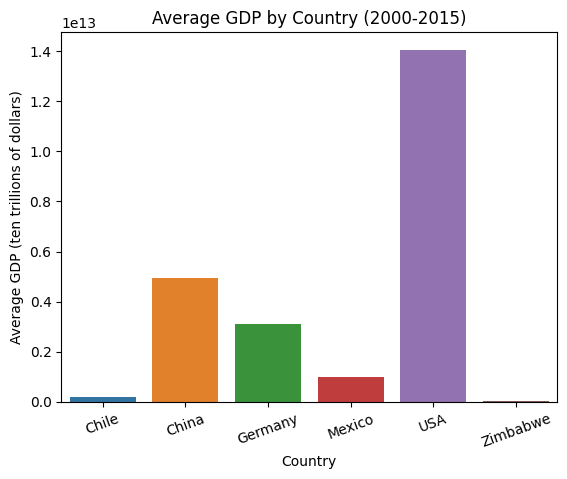

In [182]:
gdp_means = data.groupby('country').gdp.mean().reset_index()

sns.barplot(data = gdp_means, x = 'country', y = 'gdp')
plt.xticks(rotation = 20)
plt.xlabel('Country')
plt.ylabel('Average GDP (ten trillions of dollars)')
plt.title("Average GDP by Country (2000-2015)")
plt.show()

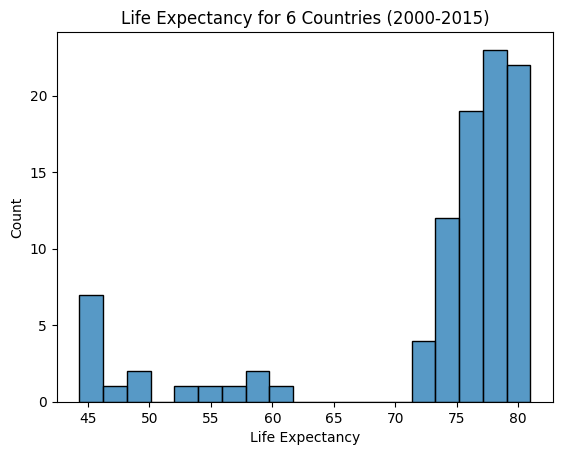

In [189]:
sns.histplot(data = data, x = 'life_expectancy')
plt.title('Life Expectancy for 6 Countries (2000-2015)')
plt.xlabel('Life Expectancy')
plt.show()

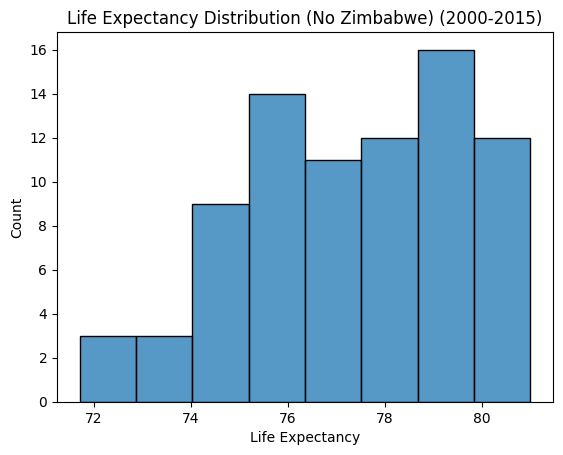

In [224]:
data_no_zimbabwe = data[data.country != 'Zimbabwe']

sns.histplot(data = data_no_zimbabwe, x = 'life_expectancy')
plt.title('Life Expectancy Distribution (No Zimbabwe) (2000-2015)')
plt.xlabel('Life Expectancy')
plt.show()

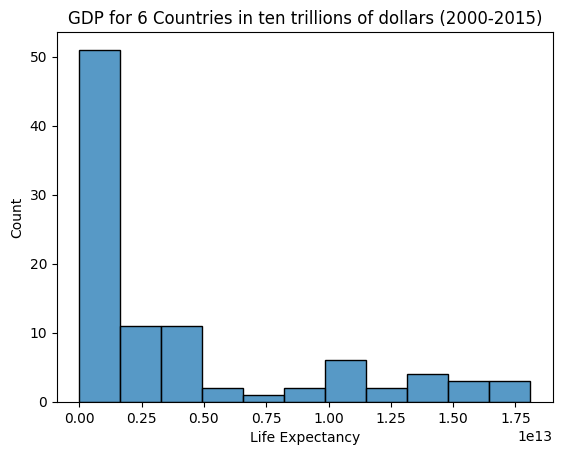

In [225]:
sns.histplot(data = data, x = 'gdp')
plt.title('GDP for 6 Countries in ten trillions of dollars (2000-2015)')
plt.xlabel('Life Expectancy')
plt.show()

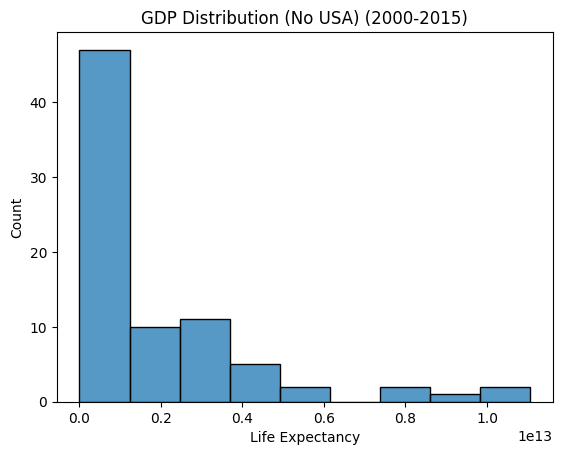

In [226]:
data_no_usa = data[data.country != 'USA']

sns.histplot(data = data_no_usa, x = 'gdp')
plt.title('GDP Distribution (No USA) (2000-2015)')
plt.xlabel('Life Expectancy')
plt.show()

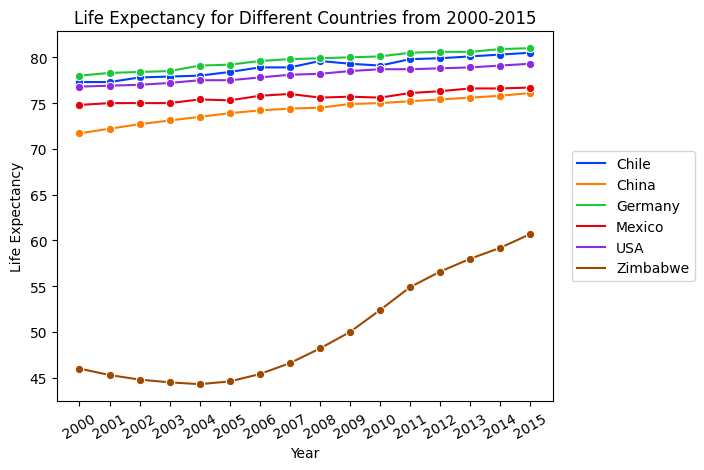

In [215]:
ax = plt.subplot()
sns.lineplot(data = data, x = 'year', y = 'life_expectancy', hue = 'country', palette = 'bright', marker = 'o')
plt.legend(loc = 'center right', bbox_to_anchor = [.8, 0.25, 0.5, 0.5])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy for Different Countries from 2000-2015')
ax.set_xticks(data.year.unique())
plt.xticks(rotation = 30)
plt.show()

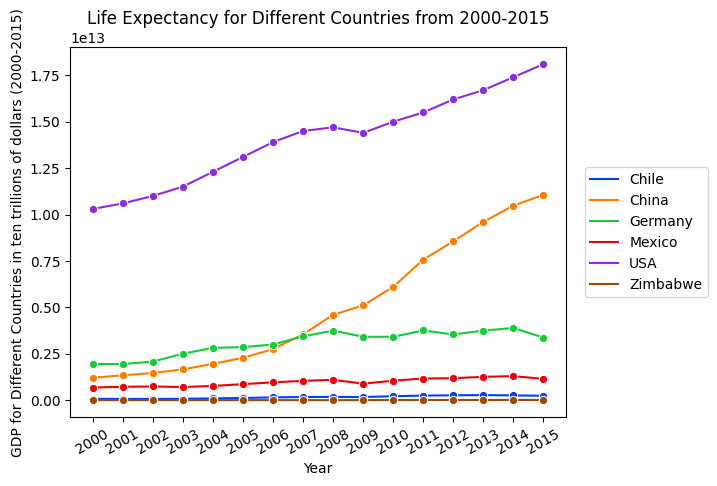

In [216]:
ax = plt.subplot()
sns.lineplot(data = data, x = 'year', y = 'gdp', hue = 'country', palette = 'bright', marker = 'o')
plt.legend(loc = 'center right', bbox_to_anchor = [.8, 0.25, 0.5, 0.5])
plt.xlabel('Year')
plt.ylabel('GDP for Different Countries in ten trillions of dollars (2000-2015)')
plt.title('Life Expectancy for Different Countries from 2000-2015')
ax.set_xticks(data.year.unique())
plt.xticks(rotation = 30)
plt.show()

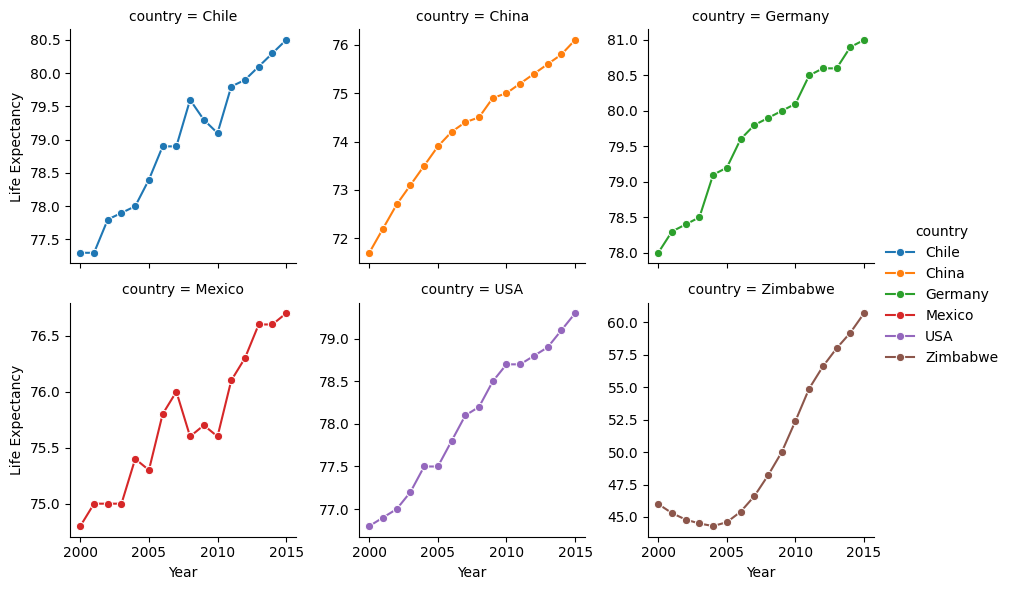

In [221]:
expectancy_facets = sns.FacetGrid(data = data, col = 'country', col_wrap = 3, hue = 'country', sharey  = False)

expectancy_facets = (expectancy_facets.map(sns.lineplot, 'year', 'life_expectancy', marker = 'o')
                     .add_legend()
                     .set_axis_labels('Year', 'Life Expectancy'), 
                    )
plt.show()

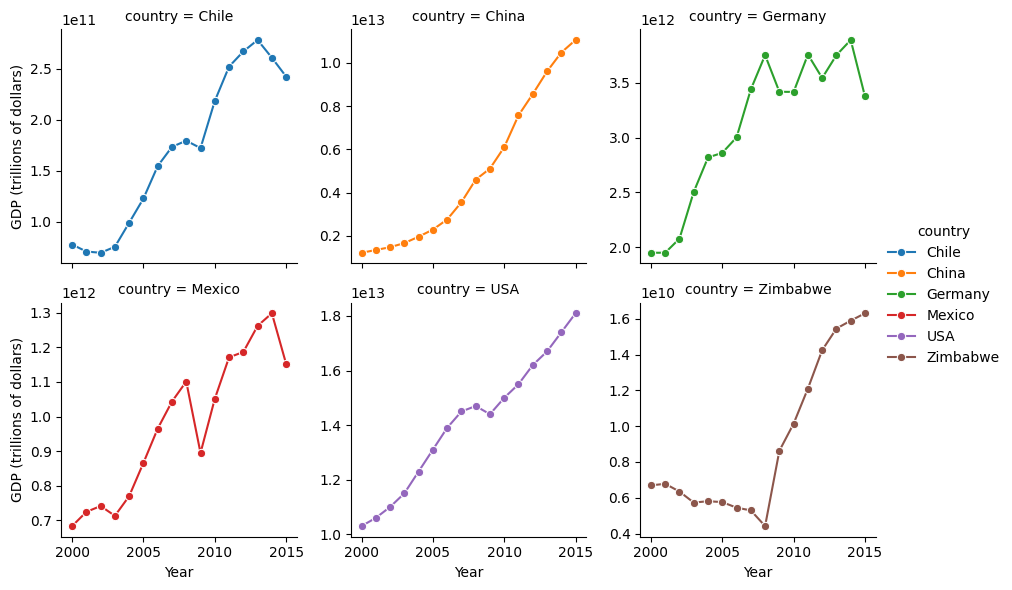

In [222]:
expectancy_facets = sns.FacetGrid(data = data, col = 'country', col_wrap = 3, hue = 'country', sharey  = False)

expectancy_facets = (expectancy_facets.map(sns.lineplot, 'year', 'gdp', marker = 'o')
                     .add_legend()
                     .set_axis_labels('Year', 'GDP (trillions of dollars)'))
plt.show()

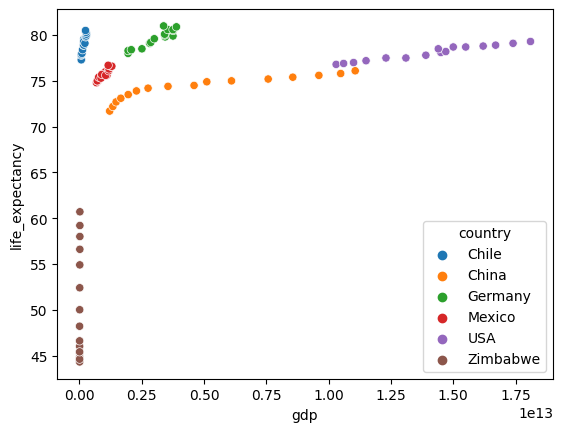

In [135]:
sns.scatterplot(data = data, x = 'gdp', y = 'life_expectancy', hue = 'country')
plt.show()

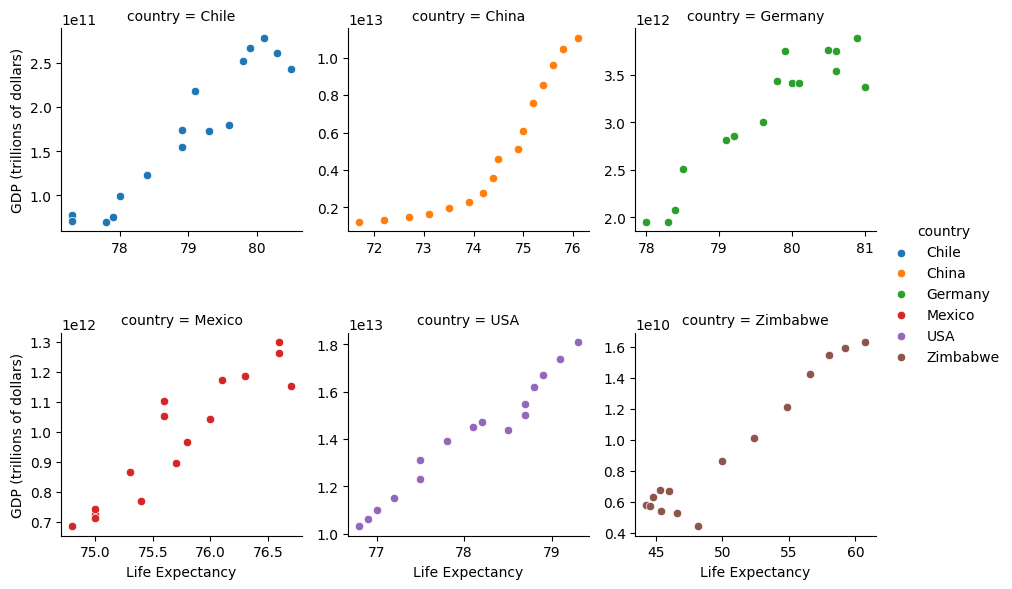

In [157]:
expectancy_facets = sns.FacetGrid(data = data, col = 'country', col_wrap = 3, hue = 'country', sharex = False, sharey  = False)

expectancy_facets = (expectancy_facets.map(sns.scatterplot, 'life_expectancy', 'gdp').add_legend().set_axis_labels('Life Expectancy', 'GDP (trillions of dollars)'), plt.subplots_adjust(hspace = 0.5))

## Conclusions

- Generally, both life expectancy and GDP have increased in this 15 year period.
-- China is the only country looked at whose GDP strictly increased
- There does appear to be a positive correlation between life expectancy and GDP within individual countries.
-- On a global scale this may not be the case. Of particular note, Chile and Zimbabwe have similar average GDPs, but Chile has a much greate average life expectancy than Zimbabwe.
--- Zimbabwe may be an outlier, as in general, its average life expectancy is significantly lower.
- Average life expectancy is very left skewed while average GDP is very right-skewed.
-- Ignoring Zimbabwe makes the life expectancy much less left-skewed.
-- Ignoring USA does not do much to the right-skewness of GDP.
- The average life expectancy for most countries is in the 70s, while for Zimbabwe it is in the 70s.